# Maestría en Economía Aplicada - UBA

## Taller de Programación

## Trabajo Práctico 2

## Docente: Noelia Romero

## Grupo No 5

## Cammisi, Andrés // Porco, Matías // Pineda, David

# Parte 0
## Preparación de la base de datos

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [42]:
import os

# Cambiar directorio de trabajo
os.chdir('/Users/usuario/Documents/UBA/2025/Trimestre 3/Taller de programación/TPs/TP2')

# Verificar que funcionó
print("Directorio actual:", os.getcwd())

Directorio actual: /Users/usuario/Documents/UBA/2025/Trimestre 3/Taller de programación/TPs/TP2


In [43]:
# ------------------------------------------------------------
# Carga de la base EPH 2005 
# ------------------------------------------------------------

base_2005 = pd.read_stata('Individual_t105.dta', convert_categoricals=False)

print("Dimensiones base 2005:", base_2005.shape)
base_2005.head()

Dimensiones base 2005: (47030, 176)


,CODUSU,nro_hogar,componente,h15,ano4,trimestre,region,mas_500,aglomerado,pondera,...,deccfr,ideccfr,rdeccfr,gdeccfr,pdeccfr,adeccfr,pj1_1,pj2_1,pj3_1,idimpp
0,125098,1.0,1.0,1.0,2005.0,1.0,1.0,S,32.0,1017.0,...,08,,07,08,,05,0.0,0.0,0.0,00000
1,125188,1.0,1.0,1.0,2005.0,1.0,1.0,S,32.0,1062.0,...,02,,02,02,,01,0.0,0.0,0.0,40020
2,125188,1.0,2.0,1.0,2005.0,1.0,1.0,S,32.0,1062.0,...,02,,02,02,,01,0.0,0.0,0.0,00000
3,125188,1.0,3.0,0.0,2005.0,1.0,1.0,S,32.0,1062.0,...,02,,02,02,,01,0.0,0.0,0.0,00000
4,125242,1.0,1.0,1.0,2005.0,1.0,1.0,S,32.0,1103.0,...,09,,09,09,,07,0.0,0.0,0.0,00000


In [44]:
# ------------------------------------------------------------
# Filtrar Región Pampeana
# ------------------------------------------------------------
base_2005 = base_2005[base_2005['region'] == 43].copy()

print("Dimensiones tras filtrar Región Pampeana:", base_2005.shape)

Dimensiones tras filtrar Región Pampeana: (14651, 176)


In [45]:
# ------------------------------------------------------------
# Ajustar nombres de columnas a minúsculas
# ------------------------------------------------------------
base_2005.columns = base_2005.columns.str.lower()

# ------------------------------------------------------------
# Seleccionar variables de interés
# ------------------------------------------------------------
vars_interes = [
    'codusu', 'nro_hogar', 'ch03', 'ch04', 'ch06', 'ch07', 'ch08',
    'ch12', 'ch13', 'ch14', 'nivel_ed', 'estado', 'cat_inac', 'itf', 'ipcf',
    'pondera', 'cat_ocup', 'pp03d', 'pp3e_tot', 
    'pp3f_tot', 'pp04a', 'pp04c', 'pp10a'
]

eph05 = base_2005[vars_interes].copy()

print("Dimensiones del subconjunto:", eph05.shape)
eph05.head()

Dimensiones del subconjunto: (14651, 23)


,codusu,nro_hogar,ch03,ch04,ch06,ch07,ch08,ch12,ch13,ch14,...,itf,ipcf,pondera,cat_ocup,pp03d,pp3e_tot,pp3f_tot,pp04a,pp04c,pp10a
29150,125082,1.0,1.0,1.0,28.0,2.0,4.0,2.0,1.0,,...,840.0,280.0,377.0,3.0,0.0,72.0,0.0,2.0,4.0,0.0
29151,125082,1.0,2.0,2.0,30.0,2.0,1.0,6.0,1.0,,...,840.0,280.0,377.0,3.0,2.0,30.0,12.0,1.0,6.0,0.0
29152,125082,1.0,3.0,1.0,4.0,5.0,1.0,1.0,2.0,01,...,840.0,280.0,377.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29153,125283,1.0,1.0,1.0,66.0,2.0,2.0,4.0,2.0,03,...,4300.0,1075.0,283.0,3.0,0.0,0.0,0.0,2.0,2.0,0.0
29154,125283,1.0,2.0,2.0,60.0,2.0,2.0,4.0,2.0,02,...,4300.0,1075.0,283.0,3.0,0.0,0.0,0.0,2.0,3.0,0.0


In [46]:
list(eph05.columns)

['codusu',
 'nro_hogar',
 'ch03',
 'ch04',
 'ch06',
 'ch07',
 'ch08',
 'ch12',
 'ch13',
 'ch14',
 'nivel_ed',
 'estado',
 'cat_inac',
 'itf',
 'ipcf',
 'pondera',
 'cat_ocup',
 'pp03d',
 'pp3e_tot',
 'pp3f_tot',
 'pp04a',
 'pp04c',
 'pp10a']

In [47]:
# ------------------------------------------------------------
# Copia de la base 2005
# ------------------------------------------------------------
eph05_raw = eph05.copy()

# ------------------------------------------------------------
# Revisión rápida de rangos y valores inusuales previo a la limpieza
# ------------------------------------------------------------
def perfil_num(df, cols):
    out = []
    for c in cols:
        s = pd.to_numeric(df[c], errors='coerce')
        out.append({
            "var": c, "n": len(s),
            "n_na": s.isna().sum(),
            "min": s.min(), "p1": s.quantile(0.01),
            "p50": s.quantile(0.50), "p99": s.quantile(0.99),
            "max": s.max(),
            "n_negativos": (s < 0).sum(),
            "n_cero": (s == 0).sum()
        })
    return pd.DataFrame(out).sort_values("var")

num_vars = [
    "ipcf", "itf", "pp3e_tot", "pp3f_tot", "pp03d",
    "ch06", "ch12", "ch13", "ch14", "pondera"
]

perfil_num(eph05, num_vars)

,var,n,n_na,min,p1,p50,p99,max,n_negativos,n_cero
5,ch06,14651,0,-1.0,-1.0,29.000000,84.0,98.0,205,0
6,ch12,14651,0,0.0,0.0,3.000000,7.0,99.0,0,1019
7,ch13,14651,0,0.0,0.0,2.000000,2.0,9.0,0,1019
8,ch14,14651,7073,0.0,0.0,3.000000,98.0,99.0,0,1099
0,ipcf,14651,0,0.0,0.0,266.666667,1800.0,11300.0,0,170
1,itf,14651,0,0.0,0.0,958.000000,5600.0,30000.0,0,170
9,pondera,14651,0,35.0,92.0,341.000000,861.0,2268.0,0,0
4,pp03d,14651,0,0.0,0.0,0.000000,2.0,9.0,0,14217
2,pp3e_tot,14651,0,0.0,0.0,0.000000,84.0,999.0,0,9376
3,pp3f_tot,14651,0,0.0,0.0,0.000000,20.0,999.0,0,14232


In [72]:
# ------------------------------------------------------------
# Limpieza final — EPH 2005
# ------------------------------------------------------------
eph05_clean = eph05.copy()

# ------------------------------------------------------------
# 1. Edad (ch06): valores negativos -> 0
# ------------------------------------------------------------
eph05_clean.loc[eph05_clean["ch06"] < 0, "ch06"] = 0

# ------------------------------------------------------------
# 2. Horas trabajadas (pp03d): filtrar valores atípicos
# ------------------------------------------------------------
eph05_clean.loc[(eph05_clean["pp03d"] < 0) | (eph05_clean["pp03d"] > 120), "pp03d"] = np.nan

# ------------------------------------------------------------
# 3. Ingresos laborales (pp3e_tot y pp3f_tot):
#     códigos 9, 99, 999, 9999, 99999 → NaN
# ------------------------------------------------------------
for v in ["pp3e_tot", "pp3f_tot"]:
    eph05_clean[v + "_missing"] = eph05_clean[v].isin([9, 99, 999, 9999, 99999]).astype(int)
    eph05_clean.loc[eph05_clean[v].isin([9, 99, 999, 9999, 99999]), v] = np.nan
    eph05_clean.loc[eph05_clean[v] < 0, v] = np.nan

# ------------------------------------------------------------
# 4. Ingreso per cápita e ITF: eliminar negativos
# ------------------------------------------------------------
for v in ["ipcf", "itf"]:
    eph05_clean.loc[eph05_clean[v] < 0, v] = np.nan

# ------------------------------------------------------------
# 5. Ponderador: debe ser positivo
# ------------------------------------------------------------
eph05_clean.loc[eph05_clean["pondera"] <= 0, "pondera"] = np.nan

# ------------------------------------------------------------
# 6. Educación (ch12–ch14): limpiar códigos especiales
# ------------------------------------------------------------
for c in ["ch12", "ch13", "ch14"]:
    eph05_clean[c] = pd.to_numeric(eph05_clean[c], errors="coerce")

# ch12: valores 0 o 9 (educación especial o sin nivel) → NA
eph05_clean.loc[eph05_clean["ch12"].isin([0, 9, 99]), "ch12"] = np.nan

# ch13: mantener solo {1,2}, el resto → NA
eph05_clean.loc[~eph05_clean["ch13"].isin([1, 2]), "ch13"] = np.nan

# ch14: mantener 0–9; eliminar 98/99 y no válidos
eph05_clean.loc[~eph05_clean["ch14"].isin(range(0, 10)), "ch14"] = np.nan

# ------------------------------------------------------------
# 7. Resumen de limpieza
# ------------------------------------------------------------
resumen_limpieza = pd.DataFrame({
    "NAs antes": eph05.isna().sum(),
    "NAs después": eph05_clean.isna().sum(),
    "Nuevos NAs": eph05_clean.isna().sum() - eph05.isna().sum()
})

print("✅ Limpieza completada.\n")
display(resumen_limpieza)




✅ Limpieza completada.



,NAs antes,NAs después,Nuevos NAs
cat_inac,0.0,0,0.0
cat_ocup,0.0,0,0.0
ch03,0.0,0,0.0
ch04,0.0,0,0.0
ch06,0.0,0,0.0
ch07,0.0,0,0.0
ch08,0.0,0,0.0
ch12,0.0,1071,1071.0
ch13,0.0,1021,1021.0
ch14,0.0,7166,7166.0


In [73]:
# ------------------------------------------------------------
# Carga base de hogar 2005
# ------------------------------------------------------------
hogar_2005 = pd.read_stata("Hogar_t105.dta", convert_categoricals=False)
hogar_2005.columns = hogar_2005.columns.str.lower()

print("Dimensiones base hogar 2005:", hogar_2005.shape)
print("Columnas disponibles (primeras 20):", list(hogar_2005.columns)[:20])

# ------------------------------------------------------------
# Seleccionar solo las variables necesarias del hogar
# ------------------------------------------------------------
vars_hogar = ["codusu", "nro_hogar", "ix_tot"]
vars_hogar = [v for v in vars_hogar if v in hogar_2005.columns]
hogar_2005_sel = hogar_2005[vars_hogar].copy()

print("Variables seleccionadas:", list(hogar_2005_sel.columns))
print("Dimensiones base hogar seleccionada:", hogar_2005_sel.shape)

# ------------------------------------------------------------
# Unión con base individual limpia
# ------------------------------------------------------------
eph05_merge = pd.merge(
    eph05_clean,
    hogar_2005_sel,
    on=["codusu", "nro_hogar"],
    how="left",
    validate="m:1"  # cada hogar aparece una sola vez en la base de hogares
)

# ------------------------------------------------------------
# Renombrar IX_TOT como miembros_hogar (consistencia TP2)
# ------------------------------------------------------------
eph05_merge = eph05_merge.rename(columns={"ix_tot": "miembros_hogar"})

# ------------------------------------------------------------
# Verificar resultado
# ------------------------------------------------------------
print("\nDimensiones tras merge:", eph05_merge.shape)
print("Proporción de hogares sin IX_TOT:", eph05_merge["miembros_hogar"].isna().mean().round(3))
print("Ejemplo de columnas finales:", eph05_merge[["codusu","nro_hogar","miembros_hogar"]].head())



Dimensiones base hogar 2005: (13597, 88)
Columnas disponibles (primeras 20): ['codusu', 'nro_hogar', 'realizada', 'ano4', 'trimestre', 'region', 'mas_500', 'aglomerado', 'pondera', 'iv1', 'iv1_esp', 'iv2', 'iv3', 'iv3_esp', 'iv4', 'iv5', 'iv6', 'iv7', 'iv7_esp', 'iv8']
Variables seleccionadas: ['codusu', 'nro_hogar', 'ix_tot']
Dimensiones base hogar seleccionada: (13597, 3)

Dimensiones tras merge: (14651, 26)
Proporción de hogares sin IX_TOT: 0.0
Ejemplo de columnas finales:      codusu  nro_hogar  miembros_hogar
0  125082          1.0             3.0
1  125082          1.0             3.0
2  125082          1.0             3.0
3  125283          1.0             4.0
4  125283          1.0             4.0


In [74]:
# ------------------------------------------------------------
# Guardar base final 2005 limpia y unificada
# ------------------------------------------------------------

eph05_final = eph05_merge.copy()
eph05_final["anio"] = 2005
eph05_final.to_csv("eph_2005_final.csv", index=False)

print("Guardado: eph_2005_final.csv", eph05_final.shape)


Guardado: eph_2005_final.csv (14651, 27)


In [75]:
# ------------------------------------------------------------
# Carga base individual 2025
# ------------------------------------------------------------
ind_2025 = pd.read_excel("usu_individual_T125.xlsx")
ind_2025.columns = ind_2025.columns.str.lower()

print("Dimensiones base individual 2025:", ind_2025.shape)
print("Primeras columnas:", list(ind_2025.columns)[:20])

# ------------------------------------------------------------
# Filtrar Región Pampeana (código 43, igual que en 2005)
# ------------------------------------------------------------
ind_2025["region"] = pd.to_numeric(ind_2025["region"], errors="coerce")
ind_2025 = ind_2025[ind_2025["region"] == 43].copy()

print("Dimensiones tras filtrar Región Pampeana:", ind_2025.shape)
print("Valores únicos en region:", ind_2025["region"].unique())

Dimensiones base individual 2025: (45425, 235)
Primeras columnas: ['codusu', 'ano4', 'trimestre', 'nro_hogar', 'componente', 'h15', 'region', 'mas_500', 'aglomerado', 'pondera', 'ch03', 'ch04', 'ch05', 'ch06', 'ch07', 'ch08', 'ch09', 'ch10', 'ch11', 'ch12']
Dimensiones tras filtrar Región Pampeana: (13803, 235)
Valores únicos en region: [43]


In [76]:
# ------------------------------------------------------------
# Selección de variables de interés
# ------------------------------------------------------------
vars_interes_2025 = [
    "codusu", "nro_hogar", "ch03", "ch04", "ch06", "ch07", "ch08",
    "ch12", "ch13", "ch14",
    "nivel_ed", "estado", "cat_inac", "itf", "ipcf",
    "pondera", "cat_ocup", "pp03d", "pp3e_tot", 
    "pp3f_tot", "pp04a", "pp04c", "pp10a"
]

# Filtrar columnas existentes (por si alguna falta)
vars_exist = [v for v in vars_interes_2025 if v in ind_2025.columns]
eph25 = ind_2025[vars_exist].copy()

print("Dimensiones del subconjunto 2025:", eph25.shape)
print("Columnas seleccionadas:", list(eph25.columns))


Dimensiones del subconjunto 2025: (13803, 23)
Columnas seleccionadas: ['codusu', 'nro_hogar', 'ch03', 'ch04', 'ch06', 'ch07', 'ch08', 'ch12', 'ch13', 'ch14', 'nivel_ed', 'estado', 'cat_inac', 'itf', 'ipcf', 'pondera', 'cat_ocup', 'pp03d', 'pp3e_tot', 'pp3f_tot', 'pp04a', 'pp04c', 'pp10a']


In [77]:
# ------------------------------------------------------------
# Limpieza final — EPH 2025
# ------------------------------------------------------------
eph25_clean = eph25.copy()

# 1. Edad (ch06): valores negativos -> 0
eph25_clean.loc[eph25_clean["ch06"] < 0, "ch06"] = 0

# 2. Horas trabajadas (pp03d): filtrar valores atípicos
eph25_clean.loc[(eph25_clean["pp03d"] < 0) | (eph25_clean["pp03d"] > 120), "pp03d"] = np.nan

# 3. Ingresos laborales (pp3e_tot y pp3f_tot): códigos 9, 99, 999... → NaN
for v in ["pp3e_tot", "pp3f_tot"]:
    eph25_clean[v + "_missing"] = eph25_clean[v].isin([9, 99, 999, 9999, 99999]).astype(int)
    eph25_clean.loc[eph25_clean[v].isin([9, 99, 999, 9999, 99999]), v] = np.nan
    eph25_clean.loc[eph25_clean[v] < 0, v] = np.nan

# 4. Ingreso total e IPCF: eliminar negativos
for v in ["ipcf", "itf"]:
    eph25_clean.loc[eph25_clean[v] < 0, v] = np.nan

# 5. Ponderador: debe ser positivo
eph25_clean.loc[eph25_clean["pondera"] <= 0, "pondera"] = np.nan

print("✅ Limpieza completada. Dimensiones:", eph25_clean.shape)


✅ Limpieza completada. Dimensiones: (13803, 25)


In [78]:
# ------------------------------------------------------------
# Carga base de hogar 2025
# ------------------------------------------------------------
hogar_2025 = pd.read_excel("usu_hogar_T125.xlsx")
hogar_2025.columns = hogar_2025.columns.str.lower()

print("Dimensiones base hogar 2025:", hogar_2025.shape)
print("Columnas disponibles (primeras 20):", list(hogar_2025.columns)[:20])

# Seleccionar y unir IX_Tot
vars_hogar_2025 = ["codusu", "nro_hogar", "ix_tot"]
vars_hogar_2025 = [v for v in vars_hogar_2025 if v in hogar_2025.columns]
hogar_2025_sel = hogar_2025[vars_hogar_2025].copy()

# Merge
eph25_merge = pd.merge(
    eph25_clean,
    hogar_2025_sel,
    on=["codusu","nro_hogar"],
    how="left",
    validate="m:1"
)

# Renombrar
eph25_merge = eph25_merge.rename(columns={"ix_tot": "miembros_hogar"})
print("\nDimensiones tras merge:", eph25_merge.shape)
print("Proporción de hogares sin IX_Tot:", eph25_merge["miembros_hogar"].isna().mean().round(3))
print(eph25_merge[["codusu","nro_hogar","miembros_hogar"]].head())


Dimensiones base hogar 2025: (15984, 98)
Columnas disponibles (primeras 20): ['codusu', 'ano4', 'trimestre', 'nro_hogar', 'realizada', 'region', 'mas_500', 'aglomerado', 'pondera', 'iv1', 'iv1_esp', 'iv2', 'iv3', 'iv3_esp', 'iv4', 'iv5', 'iv6', 'iv7', 'iv7_esp', 'iv8']

Dimensiones tras merge: (13803, 26)
Proporción de hogares sin IX_Tot: 0.0
                          codusu  nro_hogar  miembros_hogar
0  TQRMNOVQVHJOLOCDEFKID00875778          1               5
1  TQRMNOVQVHJOLOCDEFKID00875778          1               5
2  TQRMNOVQVHJOLOCDEFKID00875778          1               5
3  TQRMNOVQVHJOLOCDEFKID00875778          1               5
4  TQRMNOUPQHLOLOCDEFKID00851757          1               3


In [79]:
# ------------------------------------------------------------
# Guardar base final 2025 limpia y unificada
# ------------------------------------------------------------
eph25_final = eph25_merge.copy()
eph25_final["anio"] = 2025
eph25_final.to_csv("eph_2025_final.csv", index=False)

print("Guardado: eph_2025_final.csv", eph25_final.shape)

Guardado: eph_2025_final.csv (13803, 27)


In [ ]:
# ------------------------------------------------------------
# Carga de las bases finales 2005 y 2025
# ------------------------------------------------------------
eph05 = pd.read_csv("eph_2005_final.csv", low_memory=False)
eph25 = pd.read_csv("eph_2025_final.csv", low_memory=False)

# Añadimos columna año
eph05["anio"] = 2005
eph25["anio"] = 2025

print("Dimensiones 2005:", eph05.shape)
print("Dimensiones 2025:", eph25.shape)

# ------------------------------------------------------------
# Homogeneizar nombres de columnas
# ------------------------------------------------------------
eph05.columns = eph05.columns.str.lower()
eph25.columns = eph25.columns.str.lower()

# Igualar columnas
cols_comunes = sorted(set(eph05.columns).intersection(eph25.columns))
eph05 = eph05[cols_comunes].copy()
eph25 = eph25[cols_comunes].copy()

# ------------------------------------------------------------
# Unir bases
# ------------------------------------------------------------
eph_panel = pd.concat([eph05, eph25], ignore_index=True)

print("\nDimensiones del panel combinado:", eph_panel.shape)
print("Años presentes:", eph_panel["anio"].value_counts().to_dict())

# ------------------------------------------------------------
# Guardar base unificada
# ------------------------------------------------------------
output_path_panel = "eph_tp2_05_25.csv"
eph_panel.to_csv(output_path_panel, index=False)

print(f"✅ Panel EPH 2005–2025 guardado correctamente en: {output_path_panel}")
print("Variables incluidas:", eph_panel.columns.tolist())




# Parte I
## Creación de variables - Histogramas - Kernels

In [66]:
# ------------------------------------------------------------
# Carga de base consolidada y cálculo de Adulto Equivalente
# ------------------------------------------------------------
import pandas as pd
import numpy as np

# Cargar base panel
df = pd.read_csv("eph_tp2_05_25.csv", low_memory=False)

# 1. Calcular edad y edad²
df["edad"] = pd.to_numeric(df["ch06"], errors="coerce")
df["edad2"] = df["edad"]**2

# 2. Cargar tabla de adulto equivalente
tabla_ae_xlsx = "tabla_adulto_equiv.xlsx"
ae_raw = pd.read_excel(tabla_ae_xlsx, sheet_name=0, header=2)
ae_raw.columns = [str(c).strip() for c in ae_raw.columns]

# Detectar fila de encabezados
hdr_idx = ae_raw.index[ae_raw.iloc[:,0].astype(str).str.strip().eq("Edad")][0]
ae = ae_raw.iloc[hdr_idx+1:].reset_index(drop=True)
ae.columns = ["Edad","Mujeres","Varones"]

# Mantener filas útiles
ae = ae[ae[["Mujeres","Varones"]].apply(pd.to_numeric, errors="coerce").notna().any(axis=1)].copy()
ae["Mujeres"] = pd.to_numeric(ae["Mujeres"], errors="coerce")
ae["Varones"] = pd.to_numeric(ae["Varones"], errors="coerce")

# 3. Etiquetar edades (según rangos del TP1)
def etiqueta_edad(e):
    if pd.isna(e): return np.nan
    e = int(e)
    if e == 0:              return "Menor de 1 año"
    if 1 <= e <= 17:        return "1año" if e==1 else f"{e} años"
    if 18 <= e <= 29:       return "18 a 29 años"
    if 30 <= e <= 45:       return "30 a 45 años"
    if 46 <= e <= 60:       return "46 a 60 años"
    if 61 <= e <= 75:       return "61 a 75 años"
    return "más de 75 años"

df["etq_edad"] = df["edad"].apply(etiqueta_edad)

# 4. Mapear equivalentes según sexo
map_muj = dict(zip(ae["Edad"], ae["Mujeres"]))
map_var = dict(zip(ae["Edad"], ae["Varones"]))
df["sexo_cat"] = df["ch04"].map({1: "Varones", 2: "Mujeres"})
df["ae_muj"] = df["etq_edad"].map(map_muj)
df["ae_var"] = df["etq_edad"].map(map_var)
df["adulto_equiv"] = np.where(df["sexo_cat"].eq("Varones"), df["ae_var"], df["ae_muj"])

# 5. Calcular AE del hogar
hogar_keys = ["anio","codusu","nro_hogar"]
df["ad_equiv_hogar"] = df.groupby(hogar_keys)["adulto_equiv"].transform("sum")


## Ejercicio 1. Creación de variable edad2

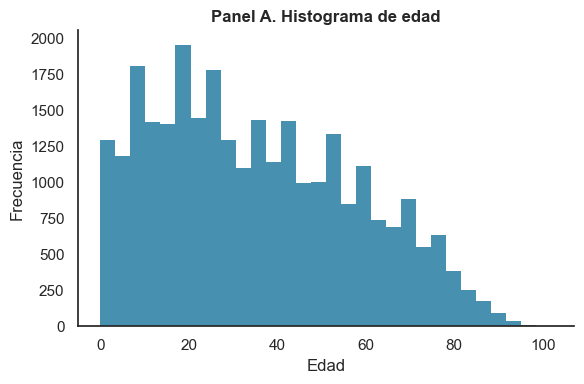

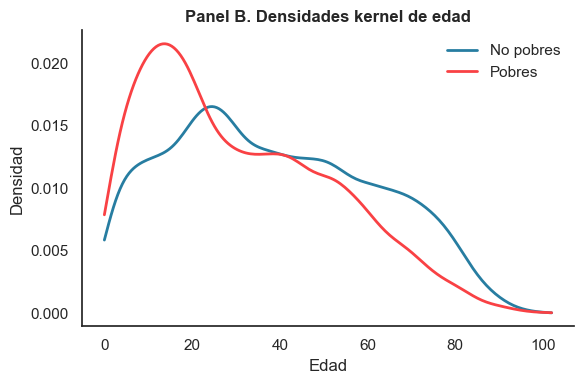

In [67]:
# ------------------------------------------------------------
# 1) Creación de variable edad2 - Histograma - Kernels
# ------------------------------------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde

# === Estilo TP1/Parte II ===
sns.set_theme(style="white")
palette_tp1 = ["#277DA1", "#2C6B8F", "#F94144"]  # azul, azul-oscuro, rojo

# CBT y pobreza (tu lógica original, sin cambios)
cbt_map = {2005: 205.07, 2025: 365_177.0}
df["cbt_ae"] = df["anio"].map(cbt_map).astype(float)
df["itf"] = pd.to_numeric(df["itf"], errors="coerce")
df["ingreso_necesario"] = df["ad_equiv_hogar"] * df["cbt_ae"]
df["pobre"] = (df["itf"] < df["ingreso_necesario"]).astype("Int64")

# Panel A: histograma de edad (fondo blanco, sin grilla, sin borde en barras)
fig, ax = plt.subplots(figsize=(6, 4))
ax.hist(
    df["edad"].dropna(), bins=30,
    color=palette_tp1[0], alpha=0.85, edgecolor="none"
)
ax.set_title("Panel A. Histograma de edad", fontsize=12, weight="bold")
ax.set_xlabel("Edad")
ax.set_ylabel("Frecuencia")
sns.despine(ax=ax)
ax.set_facecolor("white")   # asegurar fondo blanco puro
plt.tight_layout()
plt.show()

# Panel B: densidades kernel (colores TP1, líneas limpias)
d = df[["edad", "pobre"]].dropna()
if len(d) > 10 and set(d["pobre"].unique()) <= {0, 1}:
    grid = np.linspace(d["edad"].min(), d["edad"].max(), 200)
    kde_no = gaussian_kde(d.loc[d["pobre"] == 0, "edad"])
    kde_si = gaussian_kde(d.loc[d["pobre"] == 1, "edad"])

    fig, ax = plt.subplots(figsize=(6, 4))
    ax.plot(grid, kde_no(grid), label="No pobres", color=palette_tp1[0], linewidth=2)
    ax.plot(grid, kde_si(grid), label="Pobres",   color=palette_tp1[2], linewidth=2)
    ax.set_title("Panel B. Densidades kernel de edad", fontsize=12, weight="bold")
    ax.set_xlabel("Edad")
    ax.set_ylabel("Densidad")
    ax.legend(frameon=False)
    sns.despine(ax=ax)
    ax.set_facecolor("white")
    plt.tight_layout()
    plt.show()
else:
    print("No hay datos suficientes para el kernel (revisá 'edad' y 'pobre').")


In [58]:
df["pobre"].value_counts(dropna=False), df.groupby("anio")["pobre"].mean().round(3)


(pobre
 0    16324
 1    12130
 Name: count, dtype: Int64,
 anio
 2005    0.299
 2025    0.561
 Name: pobre, dtype: Float64)

## Ejercicio 2. Creación de variable educ

In [59]:
# ------------------------------------------------------------
# 2) Creación de variable educ
# ------------------------------------------------------------
import pandas as pd
import numpy as np

# Cargar base consolidada
df = pd.read_csv("eph_tp2_05_25.csv", low_memory=False)

# Normalizar tipos
for c in ["ch12","ch13","ch14"]:
    df[c] = pd.to_numeric(df[c], errors="coerce").astype("Int64")

# ch12: 0 y 9 (especial) -> NA
df.loc[df["ch12"].isin([0, 9]), "ch12"] = pd.NA

# ch13: solo {1=sí, 2=no}, resto -> NA
df.loc[~df["ch13"].isin([1, 2]), "ch13"] = pd.NA

# ch14: mantener 0..9; 98/99 -> NA
df.loc[~df["ch14"].isin(list(range(0,10))), "ch14"] = pd.NA

# Años aprobados (0–9)
anios = df["ch14"].astype("Float64")

# Mapeos según nivel educativo
completed = {2:6, 3:9, 4:12, 5:12, 6:15, 7:17, 8:20}
offset    = {2:0, 3:0, 4:6,  5:9,  6:12, 7:12, 8:17}
cap       = {2:6, 3:9, 4:6,  5:3,  6:3,  7:5,  8:3}

# Construcción de la variable educ
educ = pd.Series(pd.NA, index=df.index, dtype="Float64")

# Preescolar = 0 años
educ[df["ch12"].eq(1)] = 0

# Completó el nivel
for lvl, tot in completed.items():
    educ[(df["ch12"] == lvl) & (df["ch13"] == 1)] = tot

# No completó el nivel
for lvl in offset:
    m = (df["ch12"] == lvl) & (df["ch13"] == 2)
    educ[m] = offset[lvl] + anios[m].clip(lower=0, upper=cap[lvl])

df["educ"] = educ

# ------------------------------------------------------------
# Estadísticos descriptivos
# ------------------------------------------------------------
desc = df["educ"].describe(percentiles=[.5])[["mean","std","min","50%","max"]].round(2)
print(desc)

print("\nPor año:")
print(
    df.groupby("anio", dropna=False)["educ"]
      .agg(mean="mean", std="std", min="min", p50="median", max="max")
      .round(2)
)


mean    9.34
std     4.73
min      0.0
50%      9.0
max     20.0
Name: educ, dtype: Float64

Por año:
      mean   std  min   p50   max
anio                             
2005  8.72   4.7  0.0   8.0  20.0
2025  9.98  4.67  0.0  12.0  20.0


## Ejercicio 3. Actualización variable ingreso_total_familiar

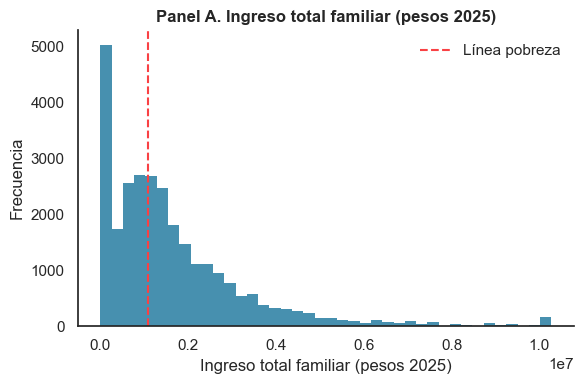

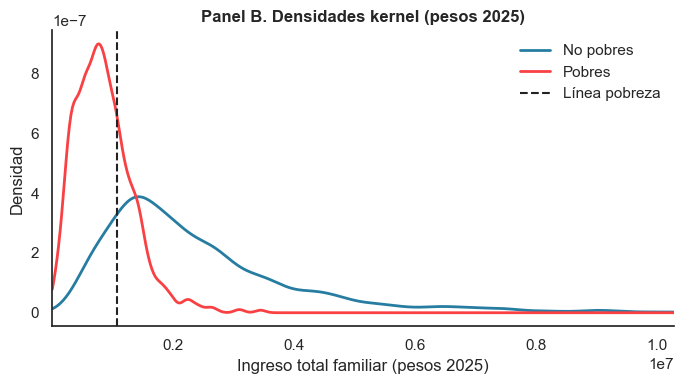

In [71]:
# ------------------------------------------------------------
# 3) Ingreso total familiar ajustado a pesos 2025 - Gráficos
# ------------------------------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde

# 1) Conversión 2005→2025
factor = 365_177 / 205.07
df["itf_2025"] = np.where(df["anio"] == 2005, df["itf"] * factor, df["itf"])

# 2) Línea de pobreza y 'pobre'
cbt_map = {2005: 205.07, 2025: 365_177.0}
df["cbt_ae"] = df["anio"].map(cbt_map).astype(float)
if "ad_equiv_hogar" not in df.columns:
    df["ad_equiv_hogar"] = 1.0
df["ingreso_necesario"] = df["ad_equiv_hogar"] * df["cbt_ae"]
df["pobre"] = (df["itf"] < df["ingreso_necesario"]).astype("Int64")

# --- Línea vertical en pesos 2025 (OPCIONAL pero recomendable, 1 línea) ---
# Si el eje X es ITF del hogar, usar la mediana del umbral DEL HOGAR en pesos 2025:
lp_val = (df["ingreso_necesario"] * np.where(df["anio"] == 2005, factor, 1)).median()

sns.set_theme(style="white")
palette_tp1 = ["#277DA1", "#2C6B8F", "#F94144"]

# 3) Panel A — Histograma (pesos 2025)
hi = df["itf_2025"].quantile(0.995)
fig, ax = plt.subplots(figsize=(6, 4))
ax.hist(df["itf_2025"].clip(0, hi).dropna(), bins=40, color=palette_tp1[0], alpha=0.85, edgecolor="none")
ax.axvline(lp_val, color=palette_tp1[2], linestyle="--", label="Línea pobreza")
ax.set_title("Panel A. Ingreso total familiar (pesos 2025)", fontsize=12, weight="bold")
ax.set_xlabel("Ingreso total familiar (pesos 2025)")
ax.set_ylabel("Frecuencia")
ax.legend(frameon=False)
sns.despine(ax=ax); ax.set_facecolor("white")
plt.tight_layout(); plt.show()

# 4) Panel B — Densidades (escala lineal, misma unidad)
d = df.loc[df["itf_2025"].between(1, hi), ["itf_2025", "pobre"]].dropna()
g0 = d.loc[d["pobre"] == 0, "itf_2025"]
g1 = d.loc[d["pobre"] == 1, "itf_2025"]

if len(g0) > 20 and len(g1) > 20:
    grid = np.linspace(d["itf_2025"].min(), hi, 400)   # ← malla lineal (ANTES: geomspace)
    k0, k1 = gaussian_kde(g0), gaussian_kde(g1)

    fig, ax = plt.subplots(figsize=(7, 4))
    ax.plot(grid, k0(grid), label="No pobres", color=palette_tp1[0], lw=2)
    ax.plot(grid, k1(grid), label="Pobres",     color=palette_tp1[2], lw=2)
    ax.axvline(lp_val, color="#222222", ls="--", label="Línea pobreza")

    # ax.set_xscale("log")  # ← ELIMINADO (escala lineal)
    ax.set_xlim(d["itf_2025"].min(), hi)
    ax.set_title("Panel B. Densidades kernel (pesos 2025)", fontsize=12, weight="bold")
    ax.set_xlabel("Ingreso total familiar (pesos 2025)")
    ax.set_ylabel("Densidad")
    ax.legend(frameon=False)
    sns.despine(ax=ax); ax.set_facecolor("white")
    plt.tight_layout(); plt.show()
else:
    print("⚠️ Densidades no graficadas: pocos datos tras el recorte.")


## Ejercicio 4. Creación variable horastrab - Jefe del hogar

In [61]:
# ------------------------------------------------------------
# 4) Total de horas trabajadas - Jefe de hogar
# ------------------------------------------------------------

# ---- Ejercicio 4: horastrab (jefe/a de hogar) ----
import pandas as pd
import numpy as np

# Cargar panel si no está en memoria
try:
    df
except NameError:
    df = pd.read_csv("eph_tp2_05_25.csv", low_memory=False)

# Asegurar numéricos
for c in ["ch03","pp3e_tot","pp3f_tot"]:
    df[c] = pd.to_numeric(df[c], errors="coerce")

# Total de horas (ocupación principal + otras), con limpieza suave
df["horastrab"] = (df["pp3e_tot"].fillna(0) + df["pp3f_tot"].fillna(0))
df.loc[(df["horastrab"] < 0) | (df["horastrab"] > 168), "horastrab"] = np.nan  # 168 = 24*7

# Filtrar jefes/as de hogar
jefes = df[df["ch03"] == 1].copy()

# Descriptivas (sin ponderación, como pide el enunciado)
desc = jefes["horastrab"].describe(percentiles=[.5])[["mean","std","min","50%","max"]].round(2)
print("Estadísticas (jefes/as, horastrab):\n", desc, "\n")

# Opcional: por año
print("Por año:")
print(
    jefes.groupby("anio")["horastrab"]
         .agg(mean="mean", std="std", min="min", p50="median", max="max")
         .round(2)
)


Estadísticas (jefes/as, horastrab):
 mean     24.26
std      25.29
min       0.00
50%      20.00
max     140.00
Name: horastrab, dtype: float64 

Por año:
       mean    std  min   p50    max
anio                                
2005  26.89  27.11  0.0  24.0  126.0
2025  21.91  23.30  0.0  18.0  140.0


## Ejercicio 5. Tamaño de la base de datos

In [62]:
# ------------------------------------------------------------
# 5) Resumen base final para Región Pampeana
# ------------------------------------------------------------
import pandas as pd
import numpy as np

# Cargar base unificada si no está en memoria
try:
    df
except NameError:
    df = pd.read_csv("eph_tp2_05_25.csv", low_memory=False)

# --- Verificar / recrear variable de pobreza si fuera necesario ---
if "pobre" not in df.columns:
    cbt_map = {2005: 205.07, 2025: 365_177.0}
    df["cbt_ae"] = df["anio"].map(cbt_map)
    df["itf"] = pd.to_numeric(df["itf"], errors="coerce")
    df["ingreso_necesario"] = df["ad_equiv_hogar"] * df["cbt_ae"]
    df["pobre"] = (df["itf"] < df["ingreso_necesario"]).astype("Int64")

# --- Tabla resumen ---
tabla = (
    df.groupby("anio")
      .agg(
          obs=("anio", "size"),
          na_pobre=("pobre", lambda x: x.isna().sum()),
          pobres=("pobre", lambda x: (x == 1).sum()),
          no_pobres=("pobre", lambda x: (x == 0).sum())
      )
      .assign(total_vars=df.shape[1])
)

# Fila total (suma horizontal)
total_row = pd.DataFrame({
    "obs": [df.shape[0]],
    "na_pobre": [df["pobre"].isna().sum()],
    "pobres": [(df["pobre"] == 1).sum()],
    "no_pobres": [(df["pobre"] == 0).sum()],
    "total_vars": [df.shape[1]]
}, index=["Total"])

tabla_final = pd.concat([tabla, total_row])
tabla_final.index.name = "Año"
tabla_final.columns = [
    "Cantidad de observaciones",
    "Observaciones con NA en 'pobre'",
    "Cantidad de pobres",
    "Cantidad de no pobres",
    "Variables limpias y homogeneizadas"
]

print("\nTabla 1. Resumen de la base final (Región Pampeana):\n")
display(tabla_final)




Tabla 1. Resumen de la base final (Región Pampeana):



,Cantidad de observaciones,Observaciones con NA en 'pobre',Cantidad de pobres,Cantidad de no pobres,Variables limpias y homogeneizadas
Año,,,,,
2005,14651,0,855,13796,34
2025,13803,0,5045,8758,34
Total,28454,0,5900,22554,34


# Parte II: Métodos no supervisados

In [85]:
# ------------------------------------------------------------
# PREPARACIÓN
# ------------------------------------------------------------

# ------------------------------------------------------------
# Instalar K Modes
# ------------------------------------------------------------
!pip install kmodes

# ------------------------------------------------------------
# Creación de variable de pobreza (binaria)
# ------------------------------------------------------------

import numpy as np
import pandas as pd

# Asegurarse de tener las variables necesarias
assert all(col in df.columns for col in ["itf", "miembros_hogar", "anio"]), \
    "Faltan variables: 'itf', 'miembros_hogar' o 'anio'."

# 1) Calcular ingreso per cápita familiar
df["ipcf"] = df["itf"] / df["miembros_hogar"]

# 2) Asignar CBT por año
df["cbt"] = np.where(df["anio"] == 2005, 205.07, 365_177)

# 3) Crear variable de pobreza (1 = pobre, 0 = no pobre)
df["pobre"] = np.where(df["ipcf"] < df["cbt"], 1, 0)

# 4) Verificación
print("Distribución de pobreza (toda la muestra):")
print(df["pobre"].value_counts(normalize=True).round(3) * 100)

print("\nPromedio de ipcf por año:")
print(df.groupby("anio")["ipcf"].mean().round(0))

Distribución de pobreza (toda la muestra):
pobre
1    51.5
0    48.5
Name: proportion, dtype: float64

Promedio de ipcf por año:
anio
2005       371.0
2025    358824.0
Name: ipcf, dtype: float64


## Ejercicio 1. Matriz de correlaciones

Matriz de correlaciones (tabla):


,edad,edad2,educ,itf,miembros_hogar,horastrab
edad,1.00,0.96,-0.11,0.10,-0.39,0.19
edad2,0.96,1.00,-0.13,0.04,-0.37,0.05
educ,-0.11,-0.13,1.00,0.17,-0.14,0.11
itf,0.10,0.04,0.17,1.00,-0.10,0.23
miembros_hogar,-0.39,-0.37,-0.14,-0.10,1.00,-0.13
horastrab,0.19,0.05,0.11,0.23,-0.13,1.00


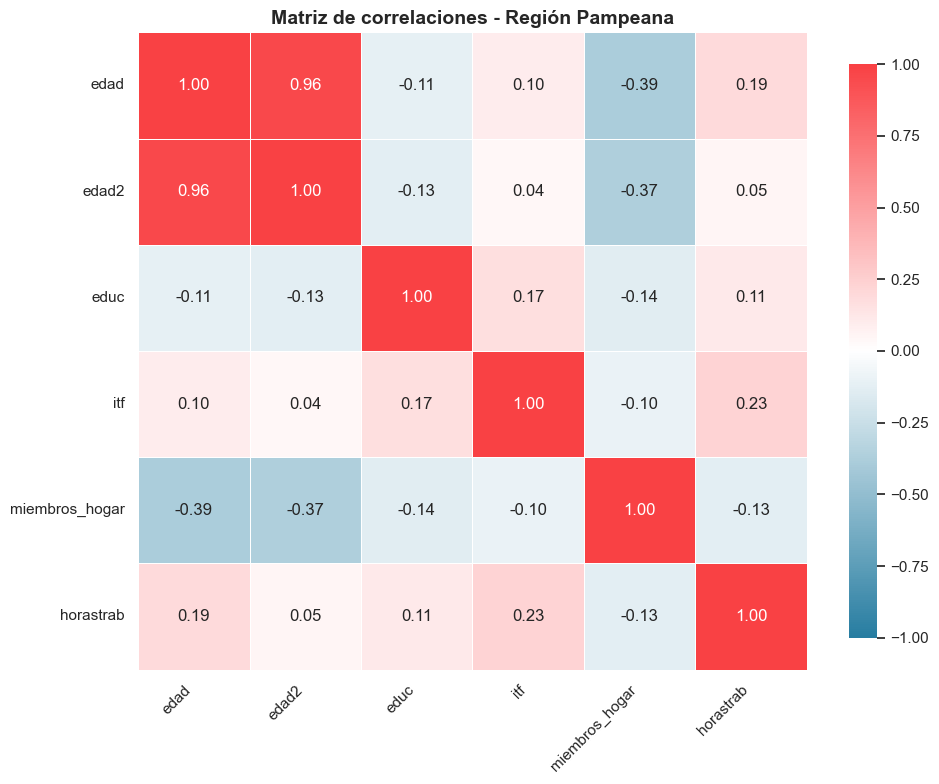

In [73]:
# ------------------------------------------------------------
# 1) Matriz de correlaciones
# ------------------------------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
from IPython.display import display

# ---------- 1) Cargar base ----------
csv_path = "eph_tp2_05_25.csv"   # ajusta la ruta si es necesario
df = pd.read_csv(csv_path)

# ---------- 2) Mapear variables requeridas ----------
ren = {
    "ch06": "edad",
    "nivel_ed": "educ",
    "itf": "itf",
    "miembros_hogar": "miembros_hogar",
    "pp3e_tot": "horastrab"
}

# Verificación mínima de columnas
faltantes = [k for k in ren.keys() if k not in df.columns]
if faltantes:
    raise ValueError(f"Faltan columnas en el CSV para este punto: {faltantes}")

df_corr = df.rename(columns=ren).copy()
df_corr["edad2"] = df_corr["edad"]**2

vars_corr = ["edad", "edad2", "educ", "itf", "miembros_hogar", "horastrab"]
df_corr_sub = df_corr[vars_corr].dropna()

# ---------- 3) Matriz de correlaciones ----------
corr_matrix = df_corr_sub.corr().round(2)
print("Matriz de correlaciones (tabla):")
display(corr_matrix)  # si no funciona, reemplazar por print(corr_matrix)

# ---------- 4) Heatmap con estilo TP1 ----------
sns.set_theme(style="white")  # estilo TP1
palette_tp1 = ["#277DA1", "#2C6B8F", "#F94144"]

# ✅ Línea corregida (la anterior se rompió al copiar/pegar):
cmap_tp1 = LinearSegmentedColormap.from_list(
    "tp1_div",
    [palette_tp1[0], "white", palette_tp1[2]],
    N=256
)

plt.figure(figsize=(10, 8))
ax = sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap=cmap_tp1,
    vmin=-1, vmax=1,
    linewidths=0.5,
    cbar_kws={"shrink": 0.9}
)
ax.set_title("Matriz de correlaciones - Región Pampeana", fontsize=14, weight="bold")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()




## Ejercicio 2. PCA con ingresos

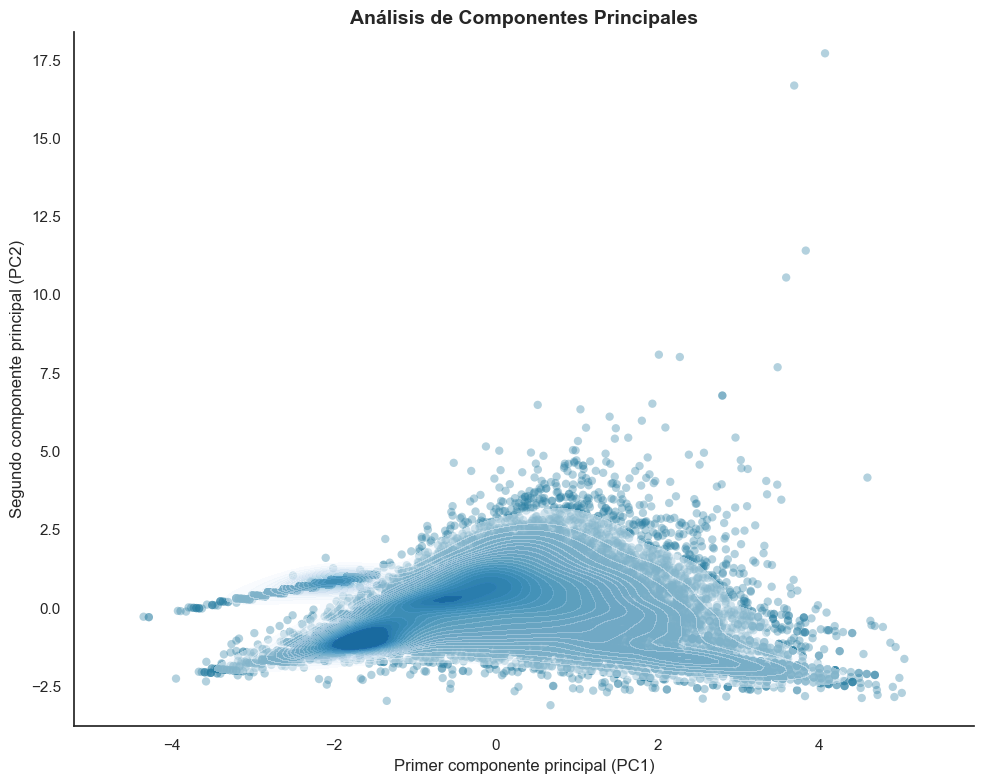

Proporción de varianza explicada por componente:
  PC1: 0.376
  PC2: 0.228
  PC3: 0.155
  PC4: 0.129
  PC5: 0.107
  PC6: 0.005
Varianza acumulada (PC1+PC2): 0.604


In [75]:
# ------------------------------------------------------------
# 2) PCA con ingresos
# ------------------------------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.colors import LinearSegmentedColormap

# ---------- 1) Cargar base y seleccionar variables ----------
csv_path = "eph_tp2_05_25.csv"
df = pd.read_csv(csv_path)

# Renombrar variables como antes
ren = {
    "ch06": "edad",
    "nivel_ed": "educ",
    "itf": "itf",
    "miembros_hogar": "miembros_hogar",
    "pp3e_tot": "horastrab"
}
df_pca = df.rename(columns=ren).copy()
df_pca["edad2"] = df_pca["edad"]**2

vars_pca = ["edad", "edad2", "educ", "itf", "miembros_hogar", "horastrab"]
df_pca = df_pca[vars_pca].dropna()

# ---------- 2) Estandarizar las variables ----------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_pca)

# ---------- 3) Aplicar PCA ----------
pca = PCA(n_components=6)
X_pca = pca.fit_transform(X_scaled)

# Crear DataFrame con los scores
scores = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(6)])

# ---------- 4) Gráfico de dispersión PC1 vs PC2 ----------
sns.set_theme(style="white")
palette_tp1 = ["#277DA1", "#2C6B8F", "#F94144"]

plt.figure(figsize=(10, 8))
ax = plt.gca()
ax.set_facecolor("white")
import seaborn as sns
sns.despine(ax=ax)  # saca marcos superior y derecho
plt.scatter(
    scores["PC1"],
    scores["PC2"],
    alpha=0.35,
    s=36,
    color=palette_tp1[0],
    edgecolor="none"
)

# Densidad suavizada (ayuda a ver la concentración de observaciones)
sns.kdeplot(
    x=scores["PC1"],
    y=scores["PC2"],
    fill=True,
    cmap="Blues",
    levels=20,       # menos contornos = menos “ruido”
    alpha=0.45,      # un poco más tenue
)

#Títulos y formato
plt.title("Análisis de Componentes Principales", fontsize=14, weight="bold")
plt.xlabel("Primer componente principal (PC1)")
plt.ylabel("Segundo componente principal (PC2)")
plt.tight_layout()
plt.show()

# ---------- 5) Imprimir varianza explicada ----------
var_exp = pca.explained_variance_ratio_
print("Proporción de varianza explicada por componente:")
for i, v in enumerate(var_exp, 1):
    print(f"  PC{i}: {v:.3f}")
print(f"Varianza acumulada (PC1+PC2): {var_exp[0]+var_exp[1]:.3f}")


## Ejercicio 3. Ponderadores de los componentes

Ponderadores (loadings) de las variables en los dos primeros componentes:


,PC1,PC2
edad,0.637,-0.131
edad2,0.618,-0.221
educ,-0.037,0.585
itf,0.131,0.559
miembros_hogar,-0.402,-0.199
horastrab,0.181,0.490


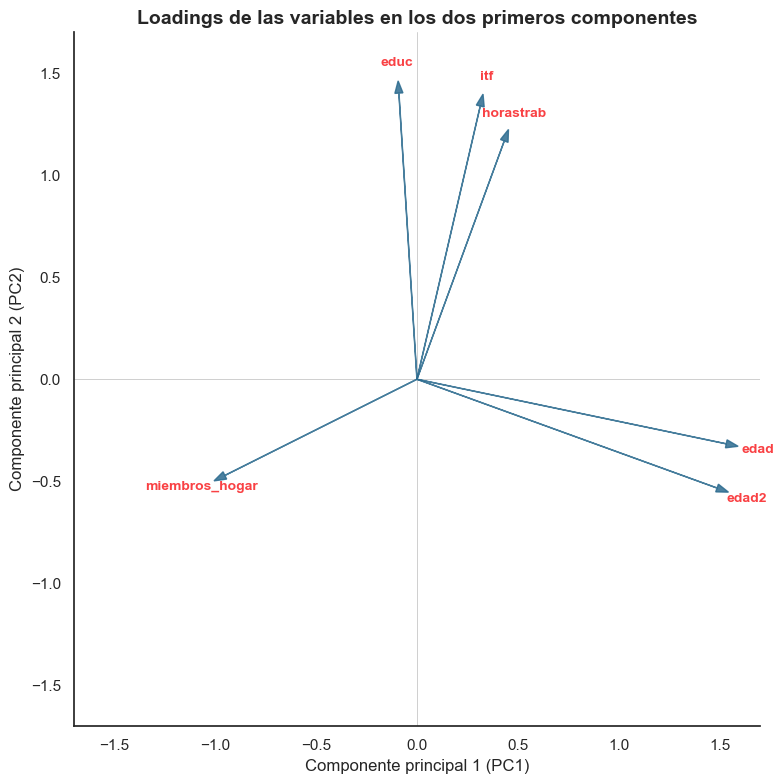

In [76]:
# ------------------------------------------------------------
# 3) Ponderadores (loadings) de los componentes
# ------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ---------- 1) Obtener los loadings ----------
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f"PC{i+1}" for i in range(pca.n_components_)],
    index=vars_pca
)

print("Ponderadores (loadings) de las variables en los dos primeros componentes:")
display(loadings.iloc[:, :2].round(3))

# ---------- 2) Gráfico de flechas (biplot simplificado) ----------
sns.set_theme(style="white")
plt.figure(figsize=(8, 8))
ax = plt.gca()
ax.set_facecolor("white")
sns.despine(ax=ax)  # elimina bordes superior y derecho
ax.axhline(0, color="#C7C7C7", linewidth=0.6, zorder=0)
ax.axvline(0, color="#C7C7C7", linewidth=0.6, zorder=0)


# Escala para flechas (puede ajustarse)
scale = 2.5

for i, var in enumerate(vars_pca):
    plt.arrow(
    0, 0,
    loadings.loc[var, "PC1"] * scale,
    loadings.loc[var, "PC2"] * scale,
    color="#2C6B8F",
    alpha=0.85,
    head_width=0.04,
    head_length=0.06,
    length_includes_head=True
    )
    plt.text(
    loadings.loc[var, "PC1"] * (scale + 0.15),
    loadings.loc[var, "PC2"] * (scale + 0.15),
    var,
    color="#F94144",
    ha='center', va='center',
    fontsize=10, weight='bold'
)


plt.title("Loadings de las variables en los dos primeros componentes", fontsize=14, weight='bold')
plt.xlabel("Componente principal 1 (PC1)")
plt.ylabel("Componente principal 2 (PC2)")
ax.set_xlim(-1.7, 1.7)
ax.set_ylim(-1.7, 1.7)
plt.tight_layout()
plt.show()


## Ejercicio 4. Varianza explicada por componentes - Gráficos

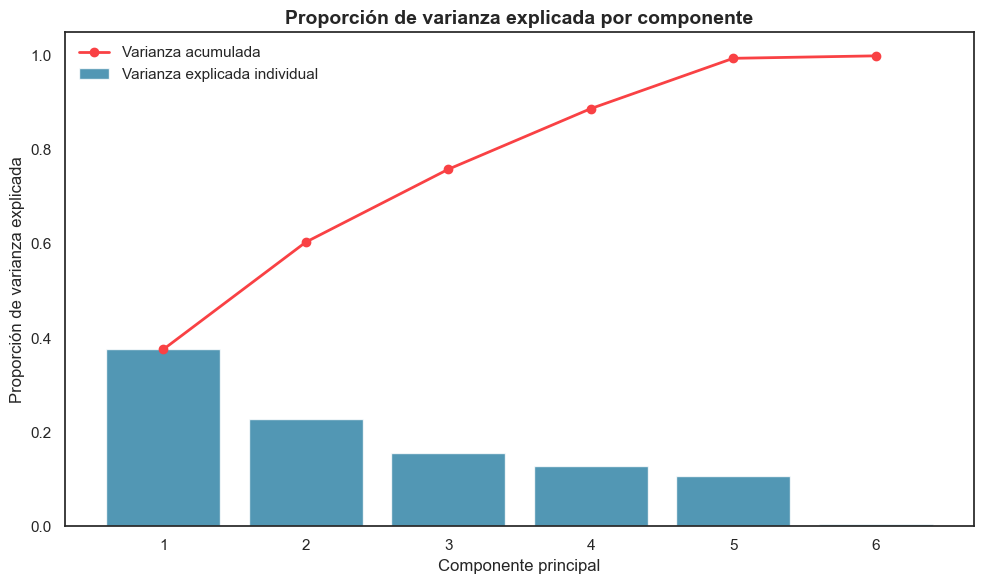

Varianza explicada por componente:
  PC1: 0.376
  PC2: 0.228
  PC3: 0.155
  PC4: 0.129
  PC5: 0.107
  PC6: 0.005
Varianza acumulada total: 1.000


In [77]:
# ------------------------------------------------------------
# 4) Varianza explicada por componente y gráficos
# ------------------------------------------------------------

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Estilo TP1
sns.set_theme(style="white")
palette_tp1 = ["#277DA1", "#2C6B8F", "#F94144"]

# ---------- 1) Obtener varianza explicada ----------
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)

# ---------- 2) Gráfico de barras + línea acumulada ----------
plt.figure(figsize=(10, 6))

# Barras individuales
bars = plt.bar(
    range(1, len(var_exp)+1),
    var_exp,
    color=palette_tp1[0],
    alpha=0.8,
    label="Varianza explicada individual"
)

# Línea acumulada
plt.plot(
    range(1, len(var_exp)+1),
    cum_var_exp,
    color=palette_tp1[2],
    marker="o",
    linewidth=2,
    label="Varianza acumulada"
)

# Detalles del gráfico
plt.title("Proporción de varianza explicada por componente", fontsize=14, weight="bold")
plt.xlabel("Componente principal")
plt.ylabel("Proporción de varianza explicada")
plt.xticks(range(1, len(var_exp)+1))
plt.ylim(0, 1.05)
plt.legend(frameon=False)
plt.tight_layout()
plt.show()

# ---------- 3) Mostrar tabla numérica ----------
print("Varianza explicada por componente:")
for i, v in enumerate(var_exp, 1):
    print(f"  PC{i}: {v:.3f}")
print(f"Varianza acumulada total: {cum_var_exp[-1]:.3f}")


## Ejercicio 5. Cluster K - medias

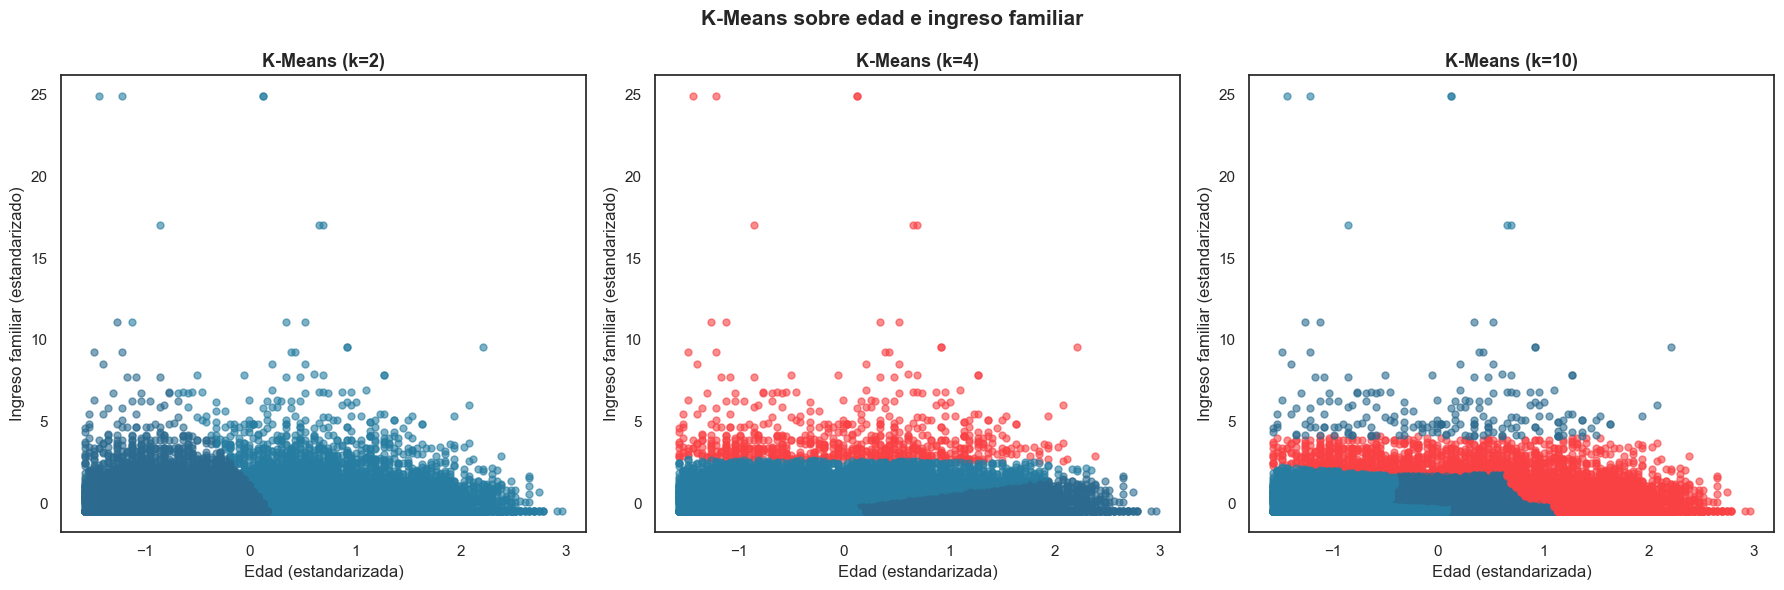

In [78]:
# ------------------------------------------------------------
# 5.1) Cluster K-medias - Algoritmo
# ------------------------------------------------------------


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# ---------- 1) Cargar base y seleccionar variables ----------
csv_path = "eph_tp2_05_25.csv"
df = pd.read_csv(csv_path)

# Renombrar variables necesarias
df = df.rename(columns={"ch06": "edad", "itf": "itf"})

# Subconjunto de interés
df_km = df[["edad", "itf"]].dropna()

# ---------- 2) Estandarizar variables ----------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_km)

# ---------- 3) Ejecutar K-means para k = 2, 4, 10 ----------
sns.set_theme(style="white")
palette_tp1 = ["#277DA1", "#2C6B8F", "#F94144"]

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for ax, k in zip(axes, [2, 4, 10]):
    kmeans = KMeans(n_clusters=k, n_init=20, random_state=133660)
    clusters = kmeans.fit_predict(X_scaled)
    
    # Paleta extendida (si hay más de 3 clusters)
    colors = palette_tp1 * (k // len(palette_tp1) + 1)
    
    # Graficar puntos con paleta TP1
    for i in range(k):
        ax.scatter(
            X_scaled[clusters == i, 0],
            X_scaled[clusters == i, 1],
            s=25, alpha=0.6, color=colors[i]
        )
    
    # Sin centroides (eliminados para estilo más limpio)
    ax.set_title(f"K-Means (k={k})", fontsize=13, weight="bold")
    ax.set_xlabel("Edad (estandarizada)")
    ax.set_ylabel("Ingreso familiar (estandarizado)")

plt.suptitle("K-Means sobre edad e ingreso familiar", fontsize=15, weight="bold")
plt.tight_layout()
plt.show()


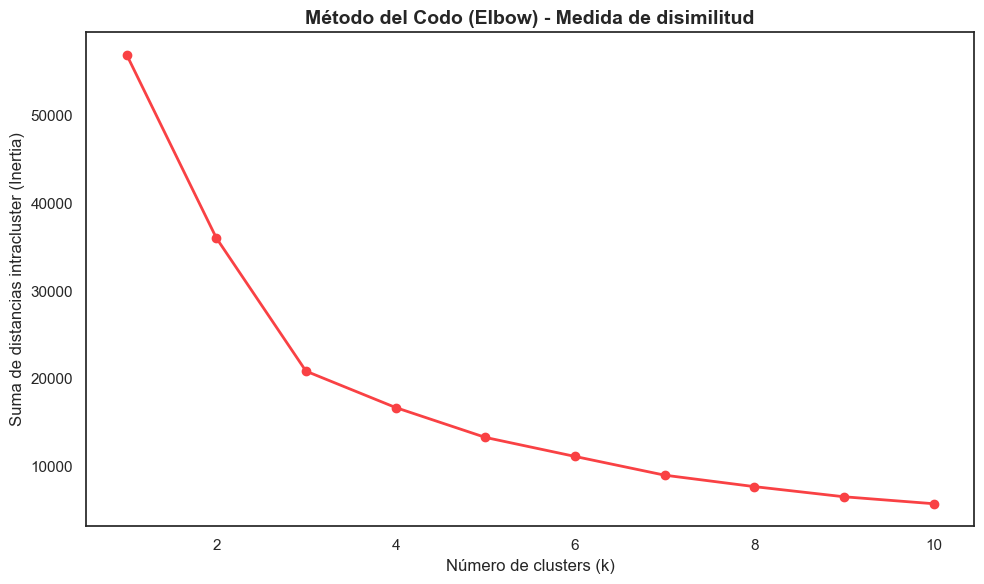

In [79]:
# ------------------------------------------------------------
# 5.2) Método del codo (Elbow)
# ------------------------------------------------------------

inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, n_init=20, random_state=133660)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# ---------- 1) Gráfico del Codo ----------
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertias, marker="o", color="#F94144", linewidth=2)
plt.title("Método del Codo (Elbow) - Medida de disimilitud", fontsize=14, weight="bold")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Suma de distancias intracluster (Inertia)")
plt.tight_layout()
plt.show()


## Ejercicio 6. Clúster Jerárquico - Dendograma

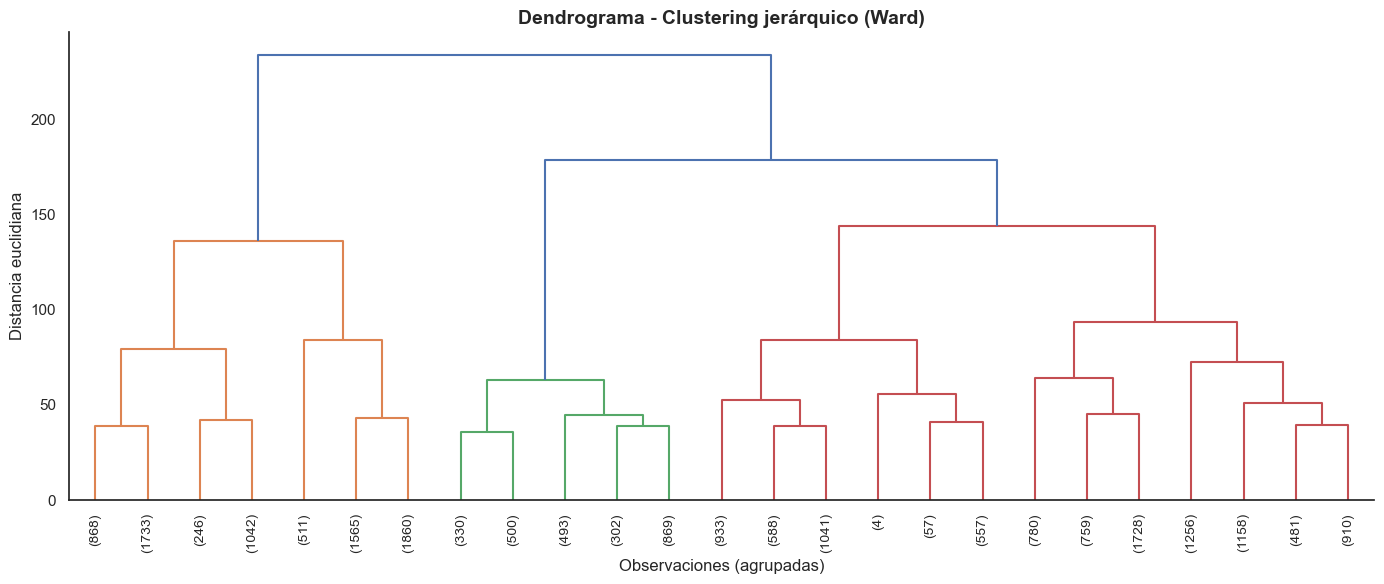

In [80]:
# ------------------------------------------------------------
# 6) Cluster Jerárquico - Dendograma
# ------------------------------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram

# ---------- 1) Cargar base y seleccionar variables ----------
csv_path = "eph_tp2_05_25.csv"
df = pd.read_csv(csv_path)

ren = {
    "ch06": "edad",
    "nivel_ed": "educ",
    "itf": "itf",
    "miembros_hogar": "miembros_hogar",
    "pp3e_tot": "horastrab"
}

df_hc = df.rename(columns=ren).copy()
df_hc["edad2"] = df_hc["edad"]**2

vars_hc = ["edad", "edad2", "educ", "itf", "miembros_hogar", "horastrab"]
df_hc = df_hc[vars_hc].dropna()

# ---------- 2) Estandarizar las variables ----------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_hc)

# ---------- 3) Calcular matriz de enlace (linkage) ----------
# método ward minimiza la varianza dentro de los clusters
Z = linkage(X_scaled, method="ward")

# ---------- 4) Gráfico del dendrograma ----------
sns.set_theme(style="white")
palette_tp1 = ["#277DA1", "#2C6B8F", "#F94144"]

plt.figure(figsize=(14, 6))
ax = plt.gca()
ax.set_facecolor("white")
sns.despine(ax=ax)

dendrogram(
    Z,
    truncate_mode="lastp",   # muestra solo los últimos clusters
    p=25,                    # cantidad de hojas visibles
    leaf_rotation=90,
    leaf_font_size=10,
    color_threshold=0.7 * np.max(Z[:, 2]),
)

plt.title("Dendrograma - Clustering jerárquico (Ward)", fontsize=14, weight="bold")
plt.xlabel("Observaciones (agrupadas)")
plt.ylabel("Distancia euclidiana")
plt.tight_layout()
plt.show()


In [30]:
# ------------------------------------------------------------
# 6) Asignación de clusters jerárquicos
# ------------------------------------------------------------

from scipy.cluster.hierarchy import fcluster

# ---------- 1) Definir número de clusters (puede ajustarse) ----------
k = 4
clusters_hc = fcluster(Z, t=k, criterion="maxclust")

# Agregar etiquetas de cluster a la base
df_hc_clusters = df_hc.copy()
df_hc_clusters["cluster_hc"] = clusters_hc

# ---------- 2) Tabla resumen por cluster ----------
tabla_clusters = (
    df_hc_clusters
    .groupby("cluster_hc")[vars_hc]
    .mean()
    .round(2)
    .reset_index()
)
tabla_clusters["n_obs"] = df_hc_clusters["cluster_hc"].value_counts().sort_index().values

print("Resumen de clusters jerárquicos (Ward):")
display(tabla_clusters)


Resumen de clusters jerárquicos (Ward):


,cluster_hc,edad,edad2,educ,itf,miembros_hogar,horastrab,n_obs
0,1,17.32,428.05,3.71,22536.77,4.74,3.69,7825
1,2,67.97,4737.66,2.86,11228.77,2.63,1.03,2494
2,3,41.64,1887.46,4.34,1978675.04,3.25,33.78,3180
3,4,42.28,1952.85,3.59,53128.87,3.89,39.16,7072


## Ejercicio 7. Clúster K - modas

Número de observaciones: 28454
Número de variables dummies: 46

Tamaño de los clusters (k=2):
cluster_kmodes_2
0    15916
1    12538
Name: count, dtype: int64

Tamaño de los clusters (k=4):
cluster_kmodes_4
0    6921
1    5662
2    8412
3    7459
Name: count, dtype: int64

Tamaño de los clusters (k=10):
cluster_kmodes_10
0    3899
1    5780
2    4142
3    3688
4    2201
5    1728
6    1133
7    2889
8    1132
9    1862
Name: count, dtype: int64


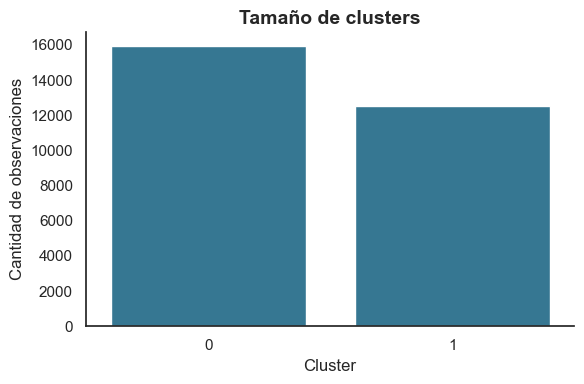

In [83]:
# ------------------------------------------------------------
# 7) Cluster K - Modas
# ------------------------------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from kmodes.kmodes import KModes

# ---------- 1) Cargar base ----------
csv_path = "eph_tp2_05_25.csv"
df = pd.read_csv(csv_path)

# ---------- 2) Variables categóricas seleccionadas ----------
vars_kmodes = [
    "ch04", "cat_ocup", "estado", "pp04a",
    "ch07", "pp10a", "nivel_ed", "cat_inac"
]

# Subconjunto de la base
df_km = df[vars_kmodes].copy().fillna("NoResponde").astype(str)

# ---------- 3) Crear matriz de dummies ----------
dummies = pd.get_dummies(df_km, drop_first=False, dtype="uint8")

print(f"Número de observaciones: {dummies.shape[0]}")
print(f"Número de variables dummies: {dummies.shape[1]}")

# ---------- 4) Ejecutar K-Modes con k = 2, 4, 10 ----------
sns.set_theme(style="white")
palette_tp1 = ["#277DA1", "#2C6B8F", "#F94144"]

km_results = {}
for k in [2, 4, 10]:
    km = KModes(n_clusters=k, init="Huang", n_init=20, random_state=133660)
    clusters = km.fit_predict(dummies)
    km_results[k] = clusters
    df[f"cluster_kmodes_{k}"] = clusters

# ---------- 5) Resumen de tamaños ----------
for k in [2, 4, 10]:
    print(f"\nTamaño de los clusters (k={k}):")
    print(df[f'cluster_kmodes_{k}'].value_counts().sort_index())

# ---------- 6) Visualización (k=2) ----------
plt.figure(figsize=(6, 4))
ax = sns.countplot(x=df["cluster_kmodes_2"], color=palette_tp1[0])
ax.set_title("Tamaño de clusters", fontsize=14, weight="bold")
ax.set_xlabel("Cluster")
ax.set_ylabel("Cantidad de observaciones")
sns.despine(ax=ax)
ax.set_facecolor("white")
plt.tight_layout()
plt.show()

# ---------- 7) (Opcional) Comparar con pobreza si existe ----------
if "pobre" in df.columns:
    print("\nComparación K=2 vs pobreza (proporciones por cluster):")
    display(pd.crosstab(df["cluster_kmodes_2"], df["pobre"], normalize="index").round(3))

Usando la columna de pobreza: 'pobre'

Distribución porcentual de pobreza por cluster:


pobre,No pobre,Pobre
cluster_kmodes_2,,
0,43.5,56.5
1,55.0,45.0


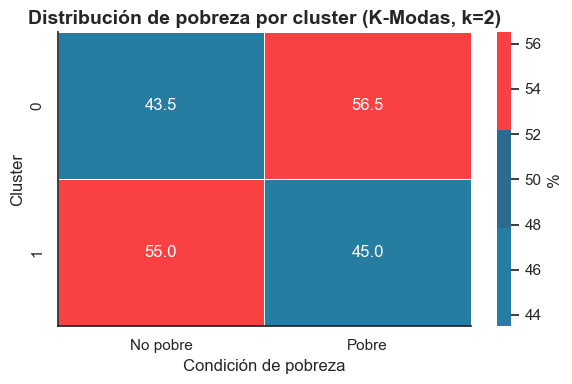

In [88]:
# ------------------------------------------------------------
# 7) Heatmap del Cluster K - Modas (k = 2)
# ------------------------------------------------------------

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="white")
palette_tp1 = ["#277DA1", "#2C6B8F", "#F94144"]

# 1) Detectar columna de pobreza (nombres comunes)
nombres_posibles = [
    "pobre", "pobreza", "es_pobre", "pobre_bin", "pov", "poverty",
    "cond_pobreza", "hogar_pobre", "pobre_hogar"
]
candidatas = [c for c in df.columns if c.lower() in nombres_posibles]

# Si no encontró coincidencias exactas, busca por substring "pobr"/"pov"
if not candidatas:
    candidatas = [c for c in df.columns if ("pobr" in c.lower()) or ("pov" in c.lower())]

if not candidatas:
    print("No se encontró una columna de pobreza en la base.")
    print("Columnas disponibles con 'pobr'/'pov' en el nombre:", candidatas)
    # No rompemos: mostramos tamaños de clusters como backup
    print("\nTamaños de clusters (k=2):")
    print(df["cluster_kmodes_2"].value_counts().sort_index())
else:
    target_col = candidatas[0]
    print(f"Usando la columna de pobreza: '{target_col}'")

    # 2) Normalizar a binaria 0/1 (acepta 0/1 o cadenas 'pobre'/'no pobre')
    y = df[target_col]

    if y.dtype.kind in "biu":    # ya es numérica (bool/int/uint)
        y_bin = y.astype(int)
    else:
        y_str = y.astype(str).str.strip().str.lower()
        # mapa flexible; ajusta si tu etiqueta tiene otros valores
        mapa = {
            "pobre": 1, "sí": 1, "si": 1, "1": 1, "true": 1, "t": 1,
            "no pobre": 0, "nopobre": 0, "no": 0, "0": 0, "false": 0, "f": 0
        }
        y_bin = y_str.map(mapa)
        # si quedaron NaN por valores no mapeados, los marcamos como 0 para no romper
        y_bin = y_bin.fillna(0).astype(int)

    # 3) Tabla de contingencia (porcentaje dentro de cada cluster)
    tabla_heat = (
        pd.crosstab(df["cluster_kmodes_2"], y_bin, normalize="index")
        .rename(columns={0: "No pobre", 1: "Pobre"})
        .round(3)
    )

    print("\nDistribución porcentual de pobreza por cluster:")
    display((tabla_heat * 100).round(1))

    # 4) Heatmap
    plt.figure(figsize=(6, 4))
    ax = sns.heatmap(
        tabla_heat * 100,
        annot=True, fmt=".1f",
        cmap=sns.color_palette(palette_tp1, as_cmap=True),
        cbar_kws={"label": "%"},
        linewidths=0.5
    )
    ax.set_title("Distribución de pobreza por cluster (K-Modas, k=2)", fontsize=14, weight="bold")
    ax.set_xlabel("Condición de pobreza")
    ax.set_ylabel("Cluster")
    sns.despine(ax=ax)
    ax.set_facecolor("white")
    plt.tight_layout()
    plt.show()



In [64]:
### FIN DEL CÓDIGO